In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

insurance = pd.read_csv(r"C:\Users\Nicholas\Downloads\datasets\Ins_Por.csv")
print(insurance.head(10))
print(insurance.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   flo

In [85]:
Age = insurance['age']
Sex = insurance['sex']
BMI = insurance['bmi']
Children = insurance['children']
Smoker = insurance['smoker']
Region = insurance['region']
Charges = insurance['charges']
#Variables of dataset include:
#Categorical: Sex, Smoker, Region
#Quantitative: BMI, Age, Children
#Target of Interest: Charges

In [86]:
Nonsmoke = insurance[insurance.smoker == "no"]
Smoke = insurance[insurance.smoker == "yes"]
#Focusing on smoking as the primary variable of interest for looking at insurance costs given the influence of other variables

In [87]:
Nonsmoke.describe()
#Summary Statistics of non-smokers

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [88]:
Smoke.describe()
#Summary Statistics of smokers

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


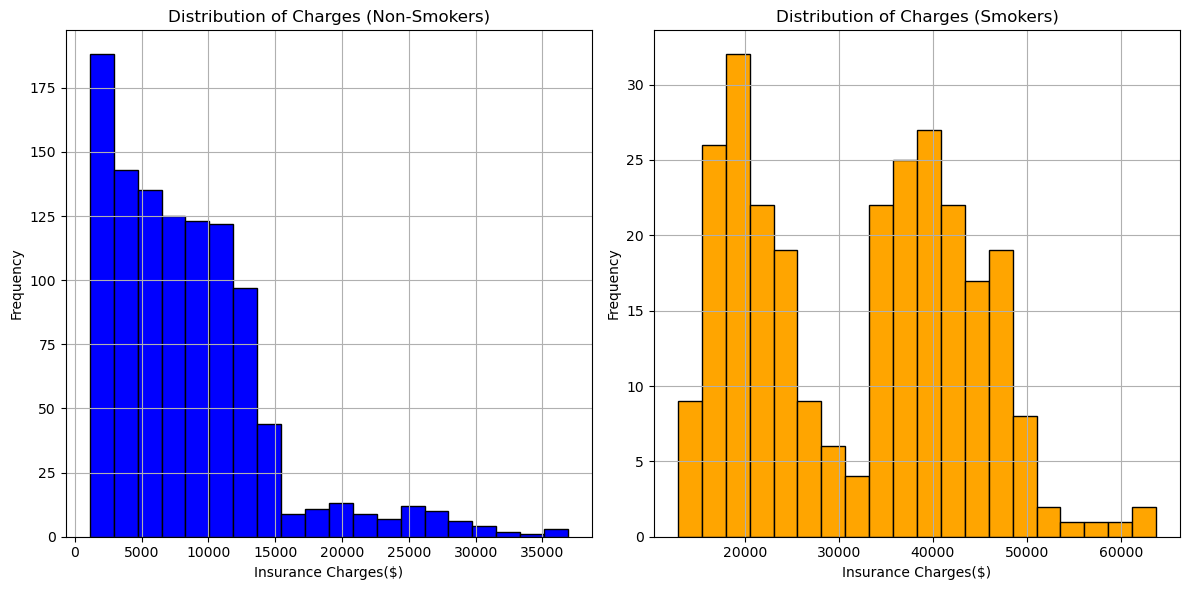

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(Nonsmoke['charges'], bins = 20, color = "blue", edgecolor = 'black')
axs[0].set_title('Distribution of Charges (Non-Smokers)')
axs[0].set_xlabel('Insurance Charges($)')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)



axs[1].hist(Smoke['charges'], bins = 20, color = "orange", edgecolor = 'black')
axs[1].set_title('Distribution of Charges (Smokers)')
axs[1].set_xlabel('Insurance Charges($)')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()
plt.show()
#Keeping other variables constant, distribution of insurance charges among smokers and non-smokers
#Non-smoker graphs = blue, Smoker graphs = orange

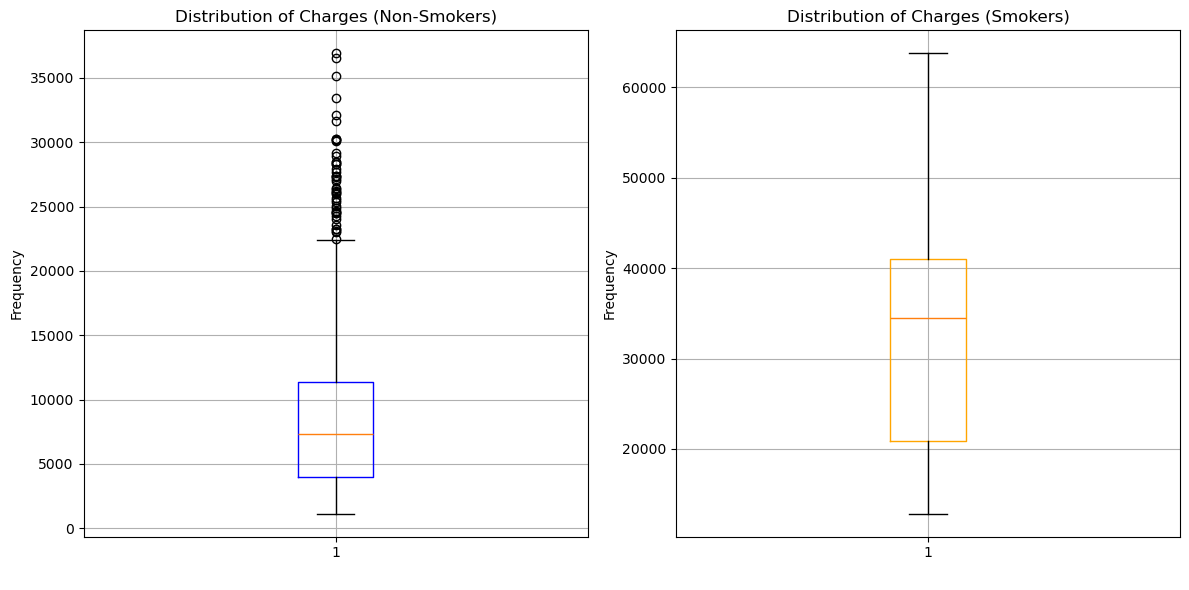

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].boxplot(Nonsmoke['charges'],
              boxprops = dict(color='blue'))
axs[0].set_title('Distribution of Charges (Non-Smokers)')
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

axs[1].boxplot(Smoke['charges'],
              boxprops = dict(color = 'orange'))
axs[1].set_title('Distribution of Charges (Smokers)')
axs[1].set_xlabel(' ')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()
plt.show()

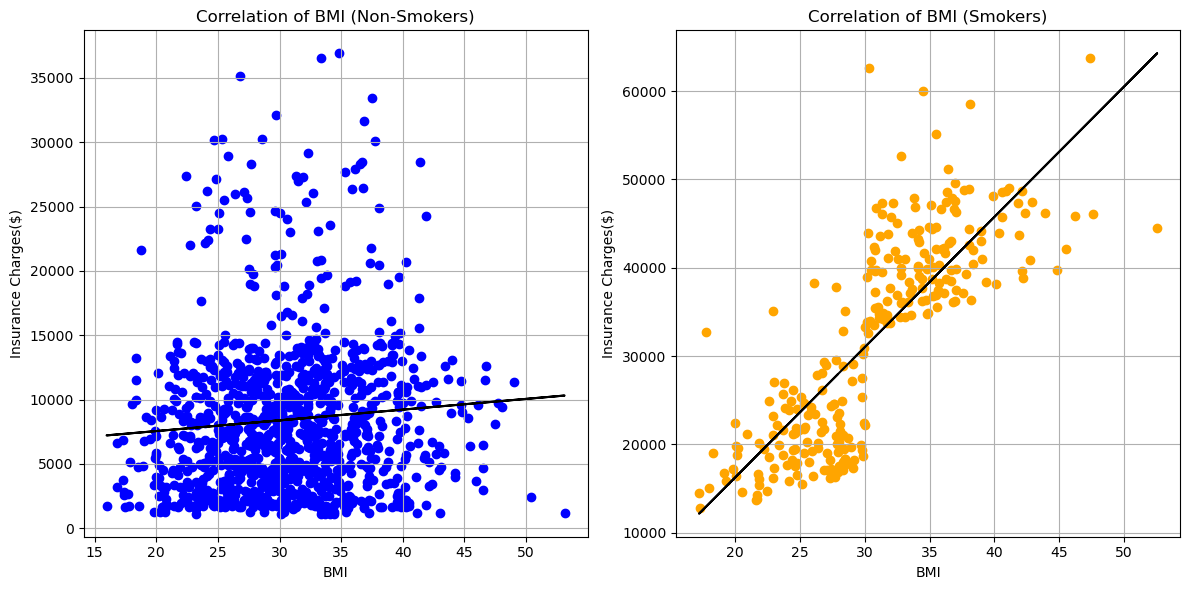

R^2 of BMI to Insurance Charges of Non-Smokers = 0.08403654312833271
R^2 of BMI to Insurance Charges of Smokers = 0.8064806070155405


In [91]:
x1 = Nonsmoke["bmi"]
y1 = Nonsmoke["charges"]
x2 = Smoke["bmi"]
y2 = Smoke["charges"]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

m1, I1 = np.polyfit(x1, y1, 1)
y_p1 = m1 * x1 + I1
corr1 = np.corrcoef(x1, y1)[0,1]

m2, I2 = np.polyfit(x2, y2, 1)
y_p2 = m2 * x2 + I2
corr2 = np.corrcoef(x2, y2)[0,1]

axs[0].scatter(x1, y1, color = "blue")
axs[0].plot(x1, y_p1, color = "black", label = f'Line of Best Fit (r = {corr1:.2f})')
axs[0].set_title('Correlation of BMI (Non-Smokers)')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Insurance Charges($)')
axs[0].grid(True)

axs[1].scatter(x2, y2, color = "orange")
axs[1].plot(x2, y_p2, color = "black")
axs[1].set_title('Correlation of BMI (Smokers)')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Insurance Charges($)')
axs[1].grid(True)

plt.tight_layout()
plt.show()
print('R^2 of BMI to Insurance Charges of Non-Smokers = ' + str(corr1))
print('R^2 of BMI to Insurance Charges of Smokers = ' + str(corr2))

#BMI the only continous variable along with insurance charges to incorporate scatterplot
#Remember the count of non-smokers and smokers when examining the amount of data points on each scatterplot
#Count of non-smokers = 1064, count of smokers = 274
#Even though we have a far less count of smokers compared to non-smokers, BMI and Insurance Charges are strongly, positively correlated for people who smoke

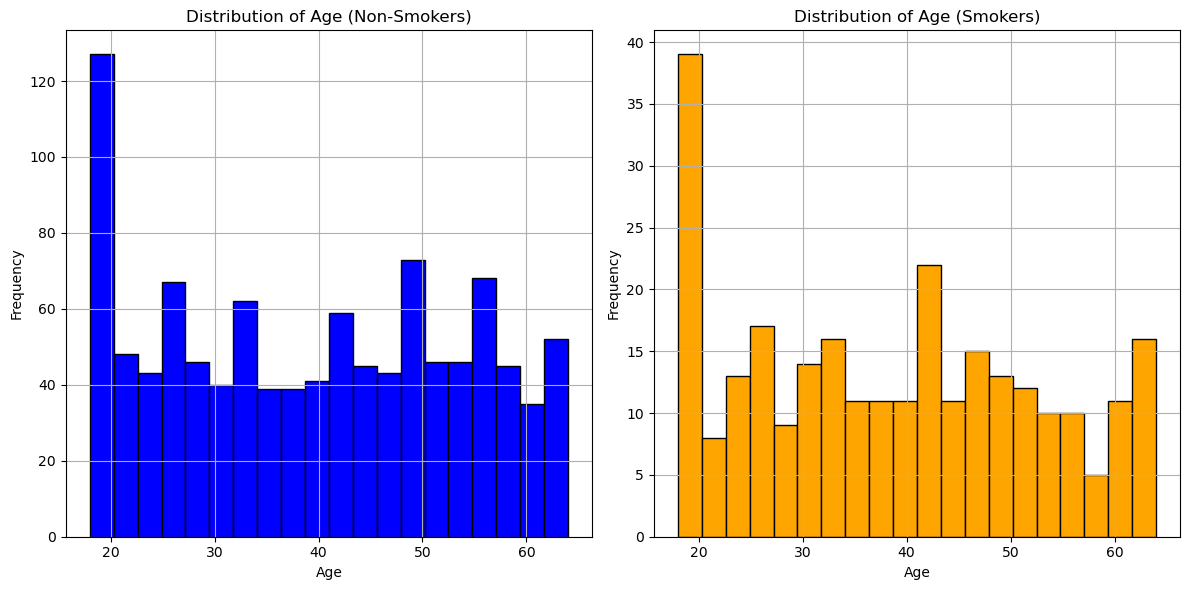

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(Nonsmoke['age'], bins = 20, color = "blue", edgecolor = 'black')
axs[0].set_title('Distribution of Age (Non-Smokers)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

axs[1].hist(Smoke['age'], bins = 20, color = "orange", edgecolor = 'black')
axs[1].set_title('Distribution of Age (Smokers)')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()
plt.show()